In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Hitters.csv to Hitters.csv
User uploaded file "Hitters.csv" with length 20906 bytes


In [30]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics.pairwise import normalize
from sklearn import model_selection
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import normalize




In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League", "Division", "NewLeague"], axis = 1).astype("float")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)

In [25]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.249e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [26]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.002e+03, tolerance: 3.899e

Text(0.5, 1.0, 'weights')

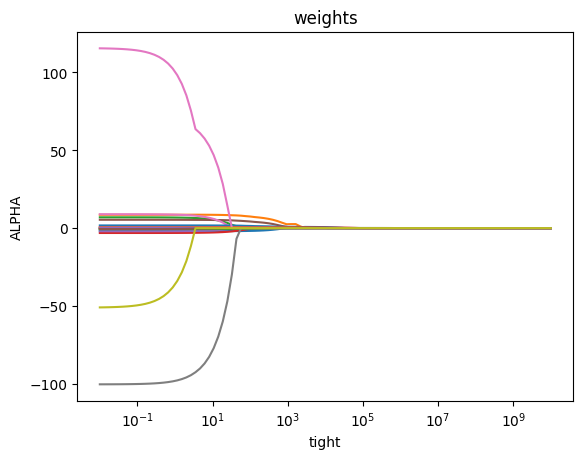

In [27]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

lasso = Lasso()
katsayilar = []

for i in lambdalar: 
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)


ax= plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale("log")

plt.xlabel("tight")
plt.ylabel("ALPHA")
plt.title("weights")

In [28]:
y_pred = lasso_model.predict(X_test)


In [29]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.7545270148771

In [33]:
lasso_cv_model = LassoCV(alphas = None,
                         cv = 10,
                         max_iter= 10000,
                         )

In [34]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000)

In [35]:
lasso_cv_model.alpha_

563.4670501833854